In [103]:
from util.helper import normalize_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [104]:
def calculate_from_report(file_name):
    num_matches, num_sequences = 0, 0
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line_list = line.strip().split(';')
            num_matches += int(line_list[1])
            num_sequences += int(line_list[2])
    return num_matches/num_sequences

report_file_name = 'output/report_true_positives_balanced.csv'
data_mean_tpr = normalize_report(report_file_name)
mean_tpr = sum(data_mean_tpr.values())/ len(data_mean_tpr)
tpr = calculate_from_report(report_file_name)
miss_rate = 1 - tpr

report_file_name = 'output/report_false_positives_balanced.csv'

data_mean_fpr = normalize_report(report_file_name)
mean_fpr = sum(data_mean_fpr.values())/ len(data_mean_fpr)
false_alarm_rate = calculate_from_report(report_file_name)

In [105]:
org_labels = sorted(data_mean_tpr.keys(), key=lambda s: s.lower())
org_labels.reverse()

In [106]:
renamed_labels_dict = {
"Being,begin,being":r"begin,\underline{b}eing",
"Capital,Capitol,capital":r"\underline{c}apital,Capitol",
"Country,County,country,county":r"\underline{c}ountry,\underline{c}ounty",
"Desert,desert,dessert":r"\underline{d}esert,\underline{d}essert",
"Easy,ease,easy":r"ease,\underline{e}asy",
"Effect,affect,effect":r"affect,\underline{e}ffect",
"Effects,affects,effects":r"affects,\underline{e}ffects",
"Except,accept,except":r"accept,\underline{e}xcept",
"Few,View,few,view":r"\underline{f}ew,\underline{v}iew",
"Form,From,form,from":r"\underline{f}orm,\underline{f}rom",
"Found,Fund,found,fund":r"\underline{f}ound,\underline{f}und",
"Fourth,forth,fourth":r"forth,\underline{f}ourth",
"Hole,Whole,hole,whole":r"\underline{h}ole,\underline{w}hole",
"Lead,Led,lead,led":r"\underline{l}ead,\underline{l}ed",
"Life,Live,life,live":r"\underline{l}ife,\underline{l}ive",
"Mad,Made,mad,made":r"\underline{m}ad,\underline{m}ade",
"Or,or,ore":r"\underline{o}r,ore",
"Past,passed,past":r"passed,\underline{p}ast",
"Peace,Piece,peace,piece":r"\underline{p}eace,\underline{p}iece",
"Plain,plain,plane":r"\underline{p}lain,plane",
"Principal,principal,principle":r"\underline{p}rincipal,principle",
"Provence,Province,province":r"Provence,\underline{p}rovince",
"Quiet,Quite,quiet,quite":r"\underline{q}uiet,\underline{q}ite",
"Rise,raise,rise":r"raise,\underline{r}ise",
"Safe,Save,safe,save":r"\underline{s}afe,\underline{s}ave",
"Site,sight,site":r"\underline{s}ite,sight",
"Split,spit,split":r"spit,\underline{s}plit",
"Than,Then,than,then":r"\underline{t}han,\underline{t}hen",
"Their,There,They,their,there,they":r"\underline{t}heir,\underline{t}here,\underline{t}hey",
"Them,Theme,them,theme":r"\underline{t}hem,\underline{t}heme",
"Things,things,thinks":r"\underline{t}hings,\underline{t}hinks",
"Three,Tree,three,tree":r"\underline{t}hree,\underline{t}ree",
"To,Too,Two,to,too,two":r"\underline{t}o,\underline{t}oo,\underline{t}wo",
"Trail,Trial,trail,trial":r"\underline{t}rail,\underline{t}rial",
"Weather,Whether,weather,whether":r"\underline{w}eather,\underline{w}ether",
"Week,weak,week":r"weak,\underline{w}eek",
"Were,Where,were,where":r"\underline{w}ere,\underline{w}here",
"Which,Witch,which,witch":r"\underline{w}hich,\underline{w}itch",
"With,width,with":r"\underline{w}idth,\underline{w}ith",
"Word,World,word,world":r"\underline{w}ord,\underline{w}orld",
"You,Your,you,your":r"\underline{y}ou,\underline{y}our",
}


In [107]:
fnr_values = [1 - data_mean_tpr[key] for key in org_labels]
#fnr_values.reverse()

fpr_values = [data_mean_fpr[key] for key in org_labels]
#fpr_values.reverse()

data = pd.DataFrame(data={'fnr':fnr_values,
                          'fpr':fpr_values,}, index=org_labels)

#data.set_index('confusion_set', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
#facecolor = '#eaeaf2'
color_fpr = 'lightblue'
color_fnr = 'lightcoral'
index = [renamed_labels_dict.get(item) if renamed_labels_dict.get(item) is not None else item for item in data.index]
index = [value.replace(',',' / ') for value in index]
column0 = data['fpr']
column1 = data['fnr']
title0 = 'False-Alarm Rate'
title1 = 'Miss Rate'

data

,fnr,fpr
"You,Your,you,your",0.030833,0.005000
"Word,World,word,world",0.076667,0.032500
"With,width,with",0.018868,0.007547
"Which,Witch,which,witch",0.024242,0.010390
"Were,Where,were,where",0.020833,0.007500
"Week,weak,week",0.016667,0.000000
"weed,wheat",0.240000,0.030000
"Weather,Whether,weather,whether",0.009167,0.005000
"Trail,Trial,trail,trial",0.094064,0.019178
"To,Too,Two,to,too,two",0.067000,0.026667


In [108]:
index

['\\underline{y}ou / \\underline{y}our',
 '\\underline{w}ord / \\underline{w}orld',
 '\\underline{w}idth / \\underline{w}ith',
 '\\underline{w}hich / \\underline{w}itch',
 '\\underline{w}ere / \\underline{w}here',
 'weak / \\underline{w}eek',
 'weed / wheat',
 '\\underline{w}eather / \\underline{w}ether',
 '\\underline{t}rail / \\underline{t}rial',
 '\\underline{t}o / \\underline{t}oo / \\underline{t}wo',
 '\\underline{t}hree / \\underline{t}ree',
 '\\underline{t}hings / \\underline{t}hinks',
 '\\underline{t}hem / \\underline{t}heme',
 '\\underline{t}heir / \\underline{t}here / \\underline{t}hey',
 '\\underline{t}han / \\underline{t}hen',
 'spit / \\underline{s}plit',
 '\\underline{s}ite / sight',
 '\\underline{s}afe / \\underline{s}ave',
 'raise / \\underline{r}ise',
 '\\underline{q}uiet / \\underline{q}ite',
 'Provence / \\underline{p}rovince',
 '\\underline{p}rincipal / principle',
 '\\underline{p}lain / plane',
 '\\underline{p}eace / \\underline{p}iece',
 'passed / \\underline{p}as

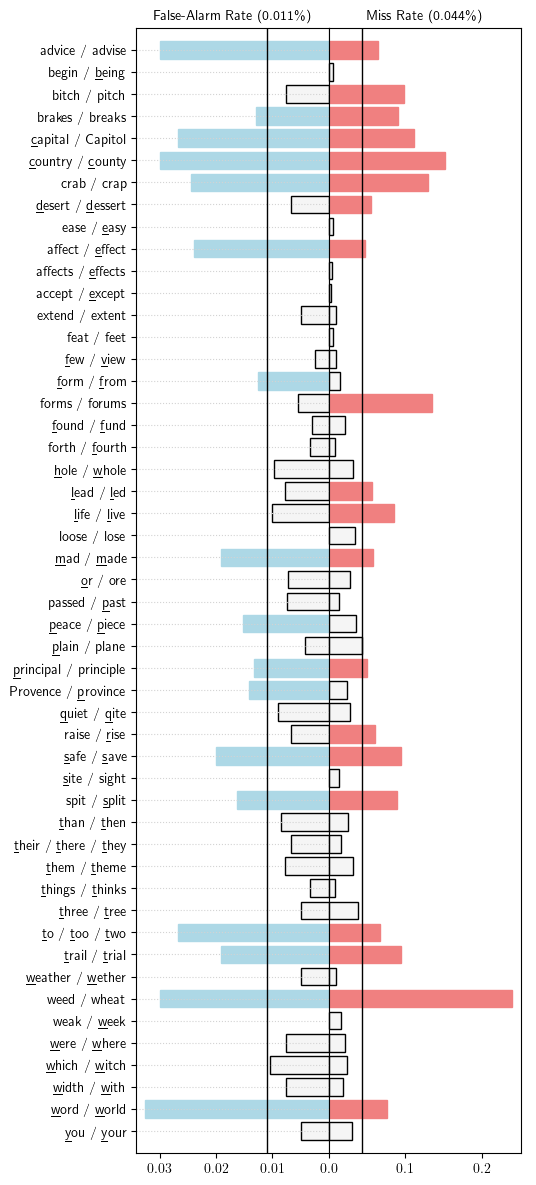

In [109]:
plt.rc('text', usetex=True)

#plt.rcParams.update({"font.family": "sans-serif"})

fig, axes = plt.subplots(figsize=(5,15), ncols=2, sharey=True)
fig.tight_layout() #adjusts subplot params so that subplots are nicely fit in the figure

# False Alarm Rate
bars = axes[0].barh(index, column0, color="whitesmoke", edgecolor="black", linewidth=1, align="center")
for idx, value in enumerate(fpr_values):
    if value > mean_fpr:
        bars[idx].set_color(color_fpr)

axes[0].set_title(f"False-Alarm Rate ({mean_fpr:.3f}\%)", fontsize=10)
axes[0].invert_xaxis()
axes[0].yaxis.tick_left()
axes[0].margins(y=0) # removes whitespace from plot edges on y axis
axes[0].set_xticks([0.01, 0.02, 0.03])
axes[0].grid(axis = 'y', color='lightgray', linestyle='dotted')

x = [false_alarm_rate]*len(index)
y = np.linspace(-1, len(index))
axes[0].plot(x, y, zorder=3, color="black", linewidth=1)

# Miss rate
bars = axes[1].barh(index, column1, color="whitesmoke", edgecolor="black", linewidth=1, align="center")
for idx, value in enumerate(fnr_values):
    if value > miss_rate:
        bars[idx].set_color(color_fnr)

axes[1].set_title(f"Miss Rate ({miss_rate:.3f}\%)", fontsize=10)
axes[1].set(yticks=index, yticklabels=index)
axes[1].tick_params(axis='y', colors='white')
axes[1].yaxis.tick_right()

x = [miss_rate]*len(index)
y = np.linspace(-1, len(index))
axes[1].plot(x, y, zorder=3, color="black", linewidth=1)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

